In [1]:
import pandas as pd, datetime, glob
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['agg.path.chunksize']=40000 



In [2]:
def custom_date_parser(x, y, z, a, b): return datetime.datetime.strptime(
    f"{x} {y} {z} {a} {b}", "%Y %m %d %H %M")


In [3]:

display_file = pd.read_csv("../Testing Notebook/Solar Data/2018/2c56c0432ecc5f6fde2c429a58d35601/2824758_18.52_-67.29_2018.csv",
                           header=[2], parse_dates={'Date': [0, 1, 2, 3, 4]}, date_parser=custom_date_parser)
display_file2 = pd.read_csv(
    "../Testing Notebook/Solar Data/2018/2c56c0432ecc5f6fde2c429a58d35601/2824758_18.52_-67.29_2018.csv", nrows=1)


display_file3 = pd.read_csv("../Testing Notebook/Solar Data/2019/e0ef61efe7cf6042bae90234975fed0b/2829149_17.90_-65.55_2019.csv",
                            header=[2], parse_dates={'Date': [0, 1, 2, 3, 4]}, date_parser=custom_date_parser)
display_file4 = pd.read_csv(
    "../Testing Notebook/Solar Data/2019/e0ef61efe7cf6042bae90234975fed0b/2829149_17.90_-65.55_2019.csv", nrows=1)


display_file["Latitude"] = display_file2.Latitude[0]
display_file["Longitude"] = display_file2.Longitude[0]


display_file3["Latitude"] = display_file4.Latitude[0]
display_file3["Longitude"] = display_file4.Longitude[0]

test_df = pd.concat([display_file3, display_file4])
test_df
test_group_df = test_df.groupby(
    [pd.Grouper(key="Date", freq='1D'), "Latitude", "Longitude"]).mean()
test_group_df
# desired_output = pd.read_csv("../Solar Data/INSOLRICO.2021302.csv", delim_whitespace=True,names=["value","latitude","longitude"])


D:\Users\viaje\anaconda3\envs\solarData\lib\site-packages\pandas\io\parsers\base_parser.py:1055: FutureWarning: 
        Use pd.to_datetime instead.

  return generic_parser(date_parser, *date_cols)


,,,GHI,DNI,Temperature,Relative Humidity,Location ID,Time Zone,Elevation,Local Time Zone,Cloud Type -15,Fill Flag 0,Surface Albedo Units
Date,Latitude,Longitude,,,,,,,,,,,
2019-01-01,17.9,-65.55,213.468750,310.114583,26.545833,72.567396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,17.9,-65.55,137.145833,133.166667,26.314583,76.980417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,17.9,-65.55,212.958333,294.072917,26.510417,75.581771,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,17.9,-65.55,208.989583,291.750000,26.613542,77.970833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,17.9,-65.55,225.625000,343.697917,26.759375,73.613750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,17.9,-65.55,127.593750,67.208333,27.034375,83.931250,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-28,17.9,-65.55,203.520833,265.177083,27.403125,80.579063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-29,17.9,-65.55,190.229167,252.864583,27.506250,79.656562,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
year = "2019"
BigDF = pd.DataFrame()
# print(BigDF)
FinalDF = pd.DataFrame()
# print(FinalDF)
files = glob.glob(
    f"../Testing Notebook/Solar Data/**/*{2019}.csv", recursive=True)
for index in range(0, len(files)):
    if len(files) > 2:
        DataFile = files.pop()
        DataFile2 = files.pop()
        CSV_DF = pd.read_csv(DataFile, header=[2], parse_dates={
                             'Date': [0, 1, 2, 3, 4]}, date_parser=custom_date_parser)
        Lat_Lon_DF1 = pd.read_csv(DataFile, nrows=1)
        CSV_DF["Longitude"] = Lat_Lon_DF1.Longitude[0]
        CSV_DF["Latitude"] = Lat_Lon_DF1.Latitude[0]
        CSV_DF2 = pd.read_csv(DataFile2, header=[2], parse_dates={
                              'Date': [0, 1, 2, 3, 4]}, date_parser=custom_date_parser)
        Lat_Lon_DF2 = pd.read_csv(DataFile2, nrows=1)
        CSV_DF2["Longitude"] = Lat_Lon_DF2.Longitude[0]
        CSV_DF2["Latitude"] = Lat_Lon_DF2.Latitude[0]
        # print(CSV_DF2)
        BigDF = BigDF.append([CSV_DF, CSV_DF2])
    elif len(files) == 1:
        DataFile = files.pop()
        CSV_DF = pd.read_csv(DataFile, header=[2], parse_dates={
                             'Date': [0, 1, 2, 3, 4]}, date_parser=custom_date_parser)
        Lat_Lon_DF1 = pd.read_csv(DataFile, nrows=1)
        CSV_DF["Longitude"] = Lat_Lon_DF1.Longitude[0]
        CSV_DF["Latitude"] = Lat_Lon_DF1.Latitude[0]
        BigDF = BigDF.append([CSV_DF])
else:
    print(len(files))
    FinalDF = BigDF.groupby([pd.Grouper(key="Date", freq='1D'), "Latitude", "Longitude"]).mean()


D:\Users\viaje\anaconda3\envs\solarData\lib\site-packages\pandas\io\parsers\base_parser.py:1055: FutureWarning: 
        Use pd.to_datetime instead.

  return generic_parser(date_parser, *date_cols)


0


In [7]:
FinalDF

GHI         DNI  Wind Speed  \
Date       Latitude Longitude                                       
2019-01-01 17.90    -66.39     208.895833  296.770833    4.665625   
                    -66.37     209.572917  296.208333    4.641667   
                    -66.35     212.677083  306.447917    4.617708   
                    -66.33     210.197917  297.406250    4.604167   
                    -66.31     221.322917  337.447917    4.592708   
...                                   ...         ...         ...   
2019-12-31 18.22    -65.63     178.177083  240.500000    2.826042   
                    -65.61     182.031250  250.208333    2.851042   
                    -65.59     180.333333  251.270833    2.853125   
                    -65.57     182.010417  253.364583    2.862500   
                    -65.55     158.468750  159.739583    2.875000   

                               Temperature  Relative Humidity  
Date       Latitude Longitude                                  
2019-01-01 17.90    -66.39       26.195833          71.920104  
                    -66.37       26.161458          71.746146  
                    -66.35       26.148958          71.713750  
                    -66.33       26.136458          71.692500  
                    -66.31       26.128125          71.659583  
...                                    ...                ...  
2019-12-31 18.22    -65.63       27.433333          78.309792  
                    -65.61       27.391667          78.828333  
                    -65.59       27.321875          79.056562  
                    -65.57       27.427083          78.746875  
                    -65.55       27.430208          78.759687  

[266815 rows x 5 columns]

In [ ]:
BigDF

In [25]:
df = BigDF[BigDF['Date'].astype(str).str.contains('2019-01-')]
# print(df)


                    Date  GHI  DNI  Wind Speed  Temperature  \
0    2019-01-01 00:00:00    0    0         5.2         25.9   
1    2019-01-01 00:15:00    0    0         5.3         25.9   
2    2019-01-01 00:30:00    0    0         5.3         25.9   
3    2019-01-01 00:45:00    0    0         5.3         25.9   
4    2019-01-01 01:00:00    0    0         5.3         25.9   
...                  ...  ...  ...         ...          ...   
2971 2019-01-31 22:45:00    0    0         3.3         20.2   
2972 2019-01-31 23:00:00    0    0         3.2         20.1   
2973 2019-01-31 23:15:00    0    0         3.2         20.0   
2974 2019-01-31 23:30:00    0    0         3.1         20.0   
2975 2019-01-31 23:45:00    0    0         3.1         19.9   

      Relative Humidity  Longitude  Latitude  
0                 78.23     -65.55     17.90  
1                 78.23     -65.55     17.90  
2                 78.23     -65.55     17.90  
3                 78.07     -65.55     17.90  
4       

MemoryError: Unable to allocate 12.0 GiB for an array with shape (1613697120,) and data type int64

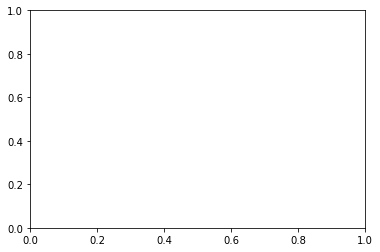

In [29]:
# BigDF["GHI"].plot()
# plt.scatter(pd.to_datetime(df), BigDF['GHI'])
# plt.xlabel('Date + Time')
# plt.ylabel('w/m^2')
# plt.title('Date vs GHI')
# plt.grid(False)
# plt.show()
BigDF.plot.scatter(x=df,y='GHI')

